In [6]:
!export CUDA_VISIBLE_DEVICES=1
import pandas as pd 
import torch, json
import numpy as np 
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode

from escnn import gspaces, nn, group

from vae_dist.dataset.dataset import FieldDataset
from vae_dist.data.visualize import get_latent_space, plot_vfield
from vae_dist.core.training_utils import construct_model 

init_notebook_mode(connected=True)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:

root = "../../data/augment_test/"

dataset_test = FieldDataset(
    root, 
    transform=False, 
    augmentation=False,
    standardize=False,
    lower_filter=True,
    log_scale=True, 
    min_max_scale=True,
    wrangle_outliers=False,
    scalar=False,
    device=device
    )

root = "../../data/cpet/"

dataset = FieldDataset(
    root, 
    transform=False, 
    augmentation=False,
    standardize=False,
    lower_filter=True,
    log_scale=True, 
    min_max_scale=True,
    wrangle_outliers=False,
    scalar=False,
    device=device
    )


root = "../../data/cpet_augmented/"
dataset_aug_cpet = FieldDataset(
    root, 
    transform=False, 
    augmentation=False,
    standardize=False,
    lower_filter=True,
    log_scale=True, 
    min_max_scale=True,
    wrangle_outliers=False,
    scalar=False,
    device=device
    )

Data shape:  (8, 3, 21, 21, 21)
Data type:  float64
------------------------- Preprocessing Info -------------------------
Helmholtz-Hodge decomposition applied:  False
Lower filter applied:  True
Log scale applied:  True
Standardization applied:  False
Min max scaling applied:  True
Wrangling outliers applied:  False
------------------------- Data Info -------------------------
Mean value in dataset:  -0.005078240290825326
Standard deviation in dataset:  0.051772067488900717
Largest value in dataset:  1.0
Smallest value in dataset:  -1.03
Nan values in dataset:  False
Inf values in dataset:  False
Data shape:  (187, 3, 21, 21, 21)
Data type:  float64
------------------------- Preprocessing Info -------------------------
Helmholtz-Hodge decomposition applied:  False
Lower filter applied:  True
Log scale applied:  True
Standardization applied:  False
Min max scaling applied:  True
Wrangling outliers applied:  False
------------------------- Data Info -------------------------
Mean value

In [3]:
options = json.load(open('./options/options_escnn_default.json'))
model_escnn = construct_model("escnn", options)
options = json.load(open('./options/options_esvae_default.json'))
model_esvae = construct_model("esvae", options)
#options = json.load(open('./options/options_cnn_default.json'))
#model_cnn = construct_model("cnn", options)
#options = json.load(open('./options/options_vae_default.json'))
#model_vae = construct_model("vae", options)

#model_esvae.load_model("./logs/log_version_esvae_1/model_1.ckpt")
model_esvae.load_model("./logs/log_version_esvae_1/model_single_datapoint.ckpt")
model_escnn.load_model("./logs/log_version_escnn_1/model_single_datapoint.ckpt")

#model_escnn.load_model("./logs/log_version_escnn_1/model_1.ckpt")
# move model to gpu 
#model_cnn.to(device)
model_escnn.to(device)
model_esvae.to(device)
#model_vae.to(device)
#model_cnn.eval()
model_escnn.eval()
model_esvae.eval()
#model_vae.eval()

inner_dim:  3
in_type: [O(3)_on_R3[o3]: {irrep_0,0 (x3)}(3)] out_type: [O(3)_on_R3[o3]: {irrep_0,0 (x32)}(32)]
in_type: [O(3)_on_R3[o3]: {irrep_0,0 (x32)}(32)] out_type: [O(3)_on_R3[o3]: {irrep_0,0 (x32)}(32)]
in_type: [O(3)_on_R3[o3]: {irrep_0,0 (x32)}(32)] out_type: [O(3)_on_R3[o3]: {irrep_0,0 (x32)}(32)]
in_type: [O(3)_on_R3[o3]: {irrep_0,0 (x32)}(32)] out_type: [O(3)_on_R3[o3]: {irrep_0,0 (x32)}(32)]
in_type: [O(3)_on_R3[o3]: {irrep_0,0 (x32)}(32)] out_type: [O(3)_on_R3[o3]: {irrep_0,0 (x32)}(32)]
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 864]               0
            Linear-2                  [-1, 100]          86,500
         LeakyReLU-3                  [-1, 100]               0
       BatchNorm1d-4                  [-1, 100]             200
           Dropout-5                  [-1, 100]               0
            Linear-6                  [-1, 1

/home/santiagovargas/anaconda3/envs/bondnet_e3nn/lib/python3.7/site-packages/torch/functional.py:478: UserWarning:

torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484809535/work/aten/src/ATen/native/TensorShape.cpp:2894.)



Model Created!
Model Created!


R3VAE(
  (fc_mu): Linear(in_features=50, out_features=1, bias=True)
  (fc_var): Linear(in_features=50, out_features=1, bias=True)
  (encoder_fully_net): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=864, out_features=100, bias=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Dropout(p=0.4, inplace=False)
    (5): Linear(in_features=100, out_features=100, bias=True)
    (6): LeakyReLU(negative_slope=0.01)
    (7): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): Dropout(p=0.4, inplace=False)
    (9): Linear(in_features=100, out_features=50, bias=True)
    (10): LeakyReLU(negative_slope=0.01)
    (11): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): Dropout(p=0.4, inplace=False)
  )
  (decoder_fully_net): Sequential(
    (0): Linear(in_features=1, out_features=50, bias=True)
 

Total number of fields:  187
[[-1.81620765e+00 -1.81620765e+00]
 [-5.70318103e-01 -5.70318103e-01]
 [ 1.78829479e+00  1.78829479e+00]
 [ 1.38173580e-01  1.38173580e-01]
 [-4.51893240e-01 -4.51893240e-01]
 [ 7.31539428e-01  7.31539428e-01]
 [ 5.48484325e+00  5.48484325e+00]
 [ 1.08237040e+00  1.08237040e+00]
 [-4.52528000e-01 -4.52528000e-01]
 [ 3.46236341e-02  3.46236341e-02]
 [-3.66192877e-01 -3.66192877e-01]
 [-1.46525621e-01 -1.46525621e-01]
 [ 2.03078270e-01  2.03078270e-01]
 [ 2.79766947e-01  2.79766947e-01]
 [-1.11170101e+00 -1.11170101e+00]
 [-3.10897994e+00 -3.10897994e+00]
 [-8.96612644e-01 -8.96612644e-01]
 [ 1.81803167e+00  1.81803167e+00]
 [ 1.82065117e+00  1.82065117e+00]
 [-2.68409848e-01 -2.68409848e-01]
 [ 1.20166242e+00  1.20166242e+00]
 [-2.93115783e+00 -2.93115783e+00]
 [ 2.27710891e+00  2.27710891e+00]
 [-3.15334988e+00 -3.15334988e+00]
 [ 9.56808567e-01  9.56808567e-01]
 [ 2.26767778e+00  2.26767778e+00]
 [ 5.92458189e-01  5.92458189e-01]
 [-9.46335077e-01 -9.46335

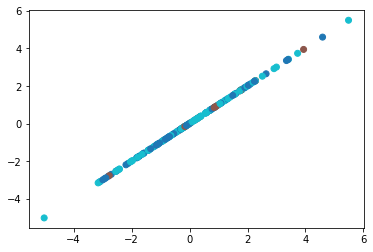

In [21]:
def scatter_plot_color_by_class(latent_space, labels):
    plt.scatter(
        latent_space[:, 0], 
        latent_space[:, 1], 
        c=labels, 
        cmap="tab10"
    )
    plt.show()
    

def pull_labels(
    names, dir_data="../../../data/protein_data.csv"
):
    # iterate through names 
    # pull labels from csv file
    # return list of labels
    labels = []
    df = pd.read_csv(dir_data)
    for name in names:
        for row in df.iterrows():
            if name == row[1]["name"]:
                labels.append(row[1]["label"])
    return labels


list_name = dataset.names
raw_names = [name.split("_")[2].split(".")[0] for name in list_name]
labels = pull_labels(raw_names, dir_data="../../data/protein_data.csv")
# convert labels to colors where H = red Y = blue and C = green

labels = [0 if label == "H" else 1 if label == "Y" else 2 for label in labels]

latent_space = get_latent_space(model_esvae, dataset, latent_dim=1, comp=[0,0])
print(latent_space)
scatter_plot_color_by_class(latent_space = latent_space, labels= labels)